# Configuring pandas

In [3]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# The pandas Series

In [7]:
# create a four item Series
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [9]:
# get value at label 1
s[1]

2

In [11]:
# return a Series with the row with labels 1 and 3
s[[1, 3]]

1    2
3    4
dtype: int64

In [13]:
# create a series using an explicit index
s = pd.Series([1, 2, 3, 4], 
               index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [15]:
# look up items the series having index 'a' and 'd'
s[['a', 'd']]

a    1
d    4
dtype: int64

In [17]:
# passing a list of integers to a Series that has
# non-integer index labels will look up based upon
# 0-based index like an array
s[[1, 2]]

b    2
c    3
dtype: int64

In [19]:
# get only the index of the Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [21]:
# create a Series who's index is a series of dates
# between the two specified dates (inclusive)
dates = pd.date_range('2016-04-01', '2016-04-06')
dates

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# create a Series with values (representing temperatures)
# for each date in the index
temps1 = pd.Series([80, 82, 85, 90, 83, 87], index = dates)
temps1

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, dtype: int64

In [25]:
# what's the temperation for 2016-4-4?
temps1['2016-04-04']

90

In [27]:
# create a second series of values using the same index
temps2 = pd.Series([70, 75, 69, 83, 79, 77], 
                   index = dates)
# the following aligns the two by their index values
# and calculates the difference at those matching labels
temp_diffs = temps1 - temps2
temp_diffs

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [29]:
# and also possible by integer position as if the 
# series was an array
#temp_diffs[2] #deprecated
temp_diffs.iloc[2]

16

In [31]:
# calculate the mean of the values in the Series
temp_diffs.mean()

9.0

# The pandas DataFrame

In [34]:
# create a DataFrame from the two series objects temp1 and temp2
# and give them column names
temps_df = pd.DataFrame(
            {'Missoula': temps1, 
             'Philadelphia': temps2})
temps_df

            Missoula  Philadelphia
2016-04-01        80            70
2016-04-02        82            75
2016-04-03        85            69
2016-04-04        90            83
2016-04-05        83            79
2016-04-06        87            77

In [36]:
# get the column with the name Missoula
temps_df['Missoula']

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [38]:
# likewise we can get just the Philadelphia column
temps_df['Philadelphia']

2016-04-01    70
2016-04-02    75
2016-04-03    69
2016-04-04    83
2016-04-05    79
2016-04-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [40]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2016-04-01            70        80
2016-04-02            75        82
2016-04-03            69        85
2016-04-04            83        90
2016-04-05            79        83
2016-04-06            77        87

In [42]:
# retrieve the Missoula column through property syntax
temps_df.Missoula

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [44]:
# calculate the temperature difference between the two cities
temps_df.Missoula - temps_df.Philadelphia

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [46]:
# add a column to temp_df which contains the difference in temps
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2016-04-01        80            70          10
2016-04-02        82            75           7
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

In [48]:
# get the columns, which is also an Index object
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [50]:
# slice the temp differences column for the rows at 
# location 1 through 4 (as though it is an array)
temps_df.Difference[1:4]

2016-04-02     7
2016-04-03    16
2016-04-04     7
Freq: D, Name: Difference, dtype: int64

In [52]:
# get the row at array position 1
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2016-04-02 00:00:00, dtype: int64

In [54]:
# the names of the columns have become the index
# they have been 'pivoted'
temps_df.iloc[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [56]:
# retrieve row by index label using .loc
temps_df.loc['2016-04-05']

Missoula        83
Philadelphia    79
Difference       4
Name: 2016-04-05 00:00:00, dtype: int64

In [58]:
# get the values in the Differences column in tows 1, 3 and 5
# using 0-based location
temps_df.iloc[[1, 3, 5]].Difference

2016-04-02     7
2016-04-04     7
2016-04-06    10
Freq: 2D, Name: Difference, dtype: int64

In [60]:
# which values in the Missoula column are > 82?
temps_df.Missoula > 82

2016-04-01    False
2016-04-02    False
2016-04-03     True
2016-04-04     True
2016-04-05     True
2016-04-06     True
Freq: D, Name: Missoula, dtype: bool

In [62]:
# return the rows where the temps for Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

# Loading data from a CSV file into a DataFrame

In [65]:
# display the contents of test1.csv
# which command to use depends on your OS
!head data/goog.csv # on non-windows systems
#!type data/test1.csv # on windows systems, all lines

Date,Open,High,Low,Close,Volume
12/19/2016,790.219971,797.659973,786.27002,794.200012,1225900
12/20/2016,796.76001,798.650024,793.27002,796.419983,925100
12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
12/22/2016,792.359985,793.320007,788.580017,791.26001,969100
12/23/2016,790.900024,792.73999,787.280029,789.909973,623400
12/27/2016,790.679993,797.859985,787.656982,791.549988,789100
12/28/2016,793.700012,794.22998,783.200012,785.049988,1132700
12/29/2016,783.330017,785.929993,778.919983,782.789978,742200
12/30/2016,782.75,782.780029,770.409973,771.820007,1760200

In [67]:
# read the contents of the file into a DataFrame
df = pd.read_csv('data/goog.csv')
df

         Date        Open        High         Low       Close   Volume
0  12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1  12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2  12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3  12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4  12/23/2016  790.900024  792.739990  787.280029  789.909973   623400
5  12/27/2016  790.679993  797.859985  787.656982  791.549988   789100
6  12/28/2016  793.700012  794.229980  783.200012  785.049988  1132700
7  12/29/2016  783.330017  785.929993  778.919983  782.789978   742200
8  12/30/2016  782.750000  782.780029  770.409973  771.820007  1760200

In [69]:
# the contents of the date column
df.Date

0    12/19/2016
1    12/20/2016
2    12/21/2016
3    12/22/2016
4    12/23/2016
5    12/27/2016
6    12/28/2016
7    12/29/2016
8    12/30/2016
Name: Date, dtype: object

In [71]:
# we can get the first value in the date column
df.Date[0]

'12/19/2016'

In [73]:
# it is a string
type(df.Date[0])

str

In [75]:
# read the data and tell pandas the date column should be 
# a date in the resulting DataFrame
df = pd.read_csv('data/goog.csv', parse_dates=['Date'])
df

        Date        Open        High         Low       Close   Volume
0 2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
1 2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2 2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
3 2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
4 2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
5 2016-12-27  790.679993  797.859985  787.656982  791.549988   789100
6 2016-12-28  793.700012  794.229980  783.200012  785.049988  1132700
7 2016-12-29  783.330017  785.929993  778.919983  782.789978   742200
8 2016-12-30  782.750000  782.780029  770.409973  771.820007  1760200

In [77]:
# verify the type now is date
# in pandas, this is actually a Timestamp
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [79]:
# unfortunately the index is numeric which makes
# accessing data by date more complicated
df.index

RangeIndex(start=0, stop=9, step=1)

In [81]:
# read in again, now specity the data column as being the 
# index of the resulting DataFrame
df = pd.read_csv('data/goog.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')
df

                  Open        High         Low       Close   Volume
Date                                                               
2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
2016-12-27  790.679993  797.859985  787.656982  791.549988   789100
2016-12-28  793.700012  794.229980  783.200012  785.049988  1132700
2016-12-29  783.330017  785.929993  778.919983  782.789978   742200
2016-12-30  782.750000  782.780029  770.409973  771.820007  1760200

In [83]:
# and the index is now a DatetimeIndex
df.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [85]:
# Visualization

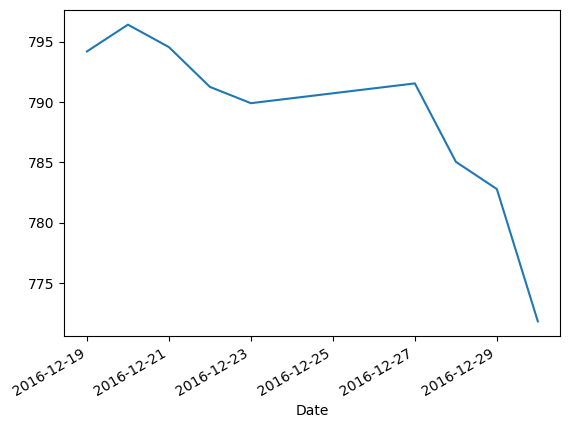

In [87]:
# plots the values in the Close column
df.Close.plot();

/opt/homebrew/anaconda3/lib/python3.11/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


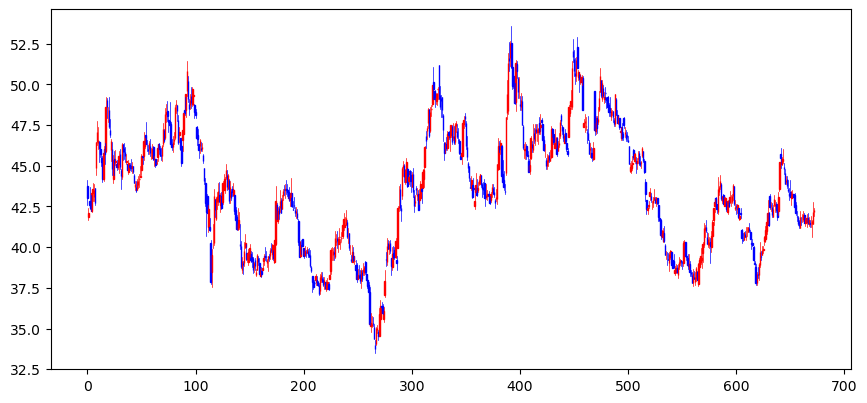

In [89]:

import tushare as ts
import matplotlib.pyplot as plt
import mpl_finance as mpf
import numpy as np
data = ts.get_k_data('601318', ktype='D', autype='qfq', start='2021-09-17', end='')
prices = data[['open', 'high', 'low', 'close']]
dates = data['date']
candleData = np.column_stack([list(range(len(dates))), prices])
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
mpf.candlestick_ohlc(ax, candleData, width=0.5, colorup='r', colordown='b')
None


In [107]:

import tushare as ts
import matplotlib.pyplot as plt
import mpl_finance as mpf
import numpy as np
data = ts.get_k_data('600519', ktype='D', autype='qfq', start='2017-09-17', end='')
prices = data[['open', 'high', 'low', 'close']]
dates = data['date']
candleData = np.column_stack([list(range(len(dates))), prices])
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
mpf.candlestick_ohlc(ax, candleData, width=0.5, colorup='r', colordown='b')
plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


AttributeError: 'DataFrame' object has no attribute 'append'